# This is assignment12

## Name : Jaehyun Lim
    
## Student ID : 20145450

## Obtaining u to minimize by lamda

$$min(\parallel Y - X(\theta)  \parallel_{2}^{2} + \lambda\parallel \theta \parallel_{2}^{2})  $$

## import packages 

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt # we'll need this later
import scipy.io as sio

## Define variable & noisy data

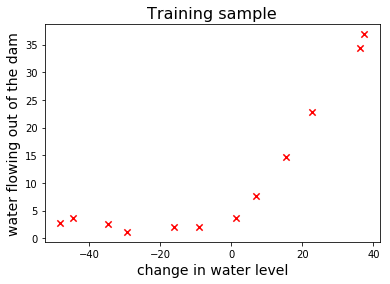

In [37]:
dataset = sio.loadmat("water.mat")
x_train = dataset["X"]
x_val = dataset["Xval"]
x_test = dataset["Xtest"]

# squeeze the target variables into one dimensional arrays
y_train = dataset["y"].squeeze()
y_val = dataset["yval"].squeeze()
y_test = dataset["ytest"].squeeze()
fig, ax = plt.subplots()
ax.scatter(x_train, y_train, marker="x", s=40, c='red')
plt.xlabel("change in water level", fontsize=14)
plt.ylabel("water flowing out of the dam", fontsize=14)
plt.title("Training sample", fontsize=16)
plt.show()

## Define function

In [38]:
def cost(theta, X, y):
    predictions = X @ theta
    return np.sum(np.square(predictions - y)) / (2 * len(y))

def cost_gradient(theta, X, y):
    predictions = X @ theta
    return X.transpose() @ (predictions - y) / len(y)

def train_linear_regression(X, y):
    theta = np.zeros(X.shape[1]) # initialize model parameters with zeros
    return opt.fmin_cg(cost, theta, cost_gradient, (X, y), disp=False)

def insert_ones(x):
    X = np.ones(shape=(x.shape[0], x.shape[1] + 1))
    X[:, 1:] = x
    return X

def learning_curves(X_train, y_train, X_val, y_val):
    train_err = np.zeros(len(y_train))
    val_err = np.zeros(len(y_train))
    for i in range(1, len(y_train)):
        theta = train_linear_regression(X_train[0:i + 1, :], y_train[0:i + 1])
        train_err[i] = cost(theta, X_train[0:i + 1, :], y_train[0:i + 1])
        val_err[i] = cost(theta, X_val, y_val)
    plt.plot(range(2, len(y_train) + 1), train_err[1:], c="r", linewidth=2)
    plt.plot(range(2, len(y_train) + 1), val_err[1:], c="b", linewidth=2)
    plt.xlabel("number of training examples", fontsize=14)
    plt.ylabel("error", fontsize=14)
    plt.legend(["training", "validation"], loc="best")
    plt.axis([2, len(y_train), 0, 100])
    plt.grid()
    
def poly_features(x, degree):
    X_poly = np.zeros(shape=(len(x), degree))
    for i in range(0, degree):
        X_poly[:, i] = x.squeeze() ** (i + 1);
    return X_poly



In [39]:
    x_train_poly = poly_features(x_train, 9)
    x_val_poly = poly_features(x_val, 9)
    x_test_poly = poly_features(x_test, 9)

In [40]:
train_means = x_train_poly.mean(axis=0)
train_stdevs = np.std(x_train_poly, axis=0, ddof=1)

x_train_poly = (x_train_poly - train_means) / train_stdevs
x_val_poly = (x_val_poly - train_means) / train_stdevs
x_test_poly = (x_test_poly - train_means) / train_stdevs

X_train_poly = insert_ones(x_train_poly)
X_val_poly = insert_ones(x_val_poly)
X_test_poly = insert_ones(x_test_poly)

## Plot polinimial fit

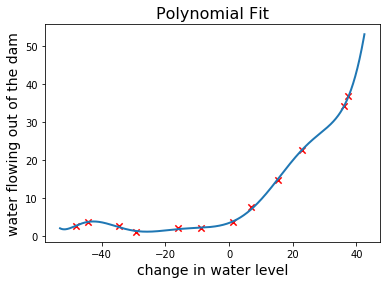

In [41]:
def plot_fit(min_x, max_x, means, stdevs, theta, degree):
    x = np.linspace(min_x - 5, max_x + 5, 1000)
    x_poly = poly_features(x, degree)
    x_poly = (x_poly - means) / stdevs
    x_poly = insert_ones(x_poly)
    plt.plot(x, x_poly @ theta, linewidth=2)
    plt.show()

theta = train_linear_regression(X_train_poly, y_train)
plt.scatter(x_train, y_train, marker="x", s=40, c='red')
plt.xlabel("change in water level", fontsize=14)
plt.ylabel("water flowing out of the dam", fontsize=14)
plt.title("Polynomial Fit", fontsize=16)
plot_fit(min(x_train), max(x_train), train_means, train_stdevs, theta, 9)

## Plot regularized polinimial fit

In [42]:
def cost(theta, X, y, lamb=0):
    predictions = X @ theta
    squared_errors = np.sum(np.square(predictions - y))
    regularization = np.sum(lamb * np.square(theta[1:]))
    return (squared_errors + regularization) / (2 * len(y))

def cost_gradient(theta, X, y, lamb=0):
    predictions = X @ theta
    gradient = X.transpose() @ (predictions - y)
    regularization = lamb * theta
    regularization[0] = 0 # don't penalize the intercept term
    return (gradient + regularization) / len(y)

def train_linear_regression(X, y, lamb=0):
    theta = np.zeros(X.shape[1])
    return opt.fmin_cg(cost, theta, cost_gradient, (X, y, lamb), disp=False)

def learning_curves(X_train, y_train, X_val, y_val, lamb=0):
    train_err = np.zeros(len(y_train))
    val_err = np.zeros(len(y_train))
    for i in range(1, len(y_train)):
        theta = train_linear_regression(X_train[0:i + 1, :], y_train[0:i + 1], lamb)
        train_err[i] = cost(theta, X_train[0:i + 1, :], y_train[0:i + 1])
        val_err[i] = cost(theta, X_val, y_val)
    plt.plot(range(2, len(y_train) + 1), train_err[1:], c="r", linewidth=2)
    plt.plot(range(2, len(y_train) + 1), val_err[1:], c="b", linewidth=2)
    plt.xlabel("number of training examples", fontsize=14)
    plt.ylabel("error", fontsize=14)
    plt.legend(["Training", "Validation"], loc="best")
    plt.axis([2, len(y_train), 0, 100])
    plt.grid()

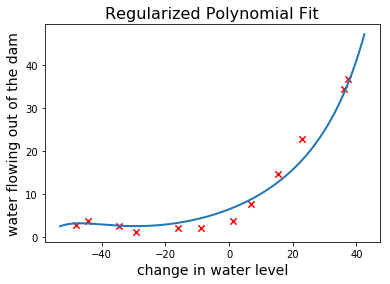

In [43]:
theta = train_linear_regression(X_train_poly, y_train, 1)
plt.scatter(x_train, y_train, marker="x", s=40, c='red')
plt.xlabel("change in water level", fontsize=14)
plt.ylabel("water flowing out of the dam", fontsize=14)
plt.title("Regularized Polynomial Fit", fontsize=16)
plot_fit(min(x_train), max(x_train), train_means, train_stdevs, theta, 9)

## Plot the polynomial curves that fit the noisy data by the least square error with varying lambda

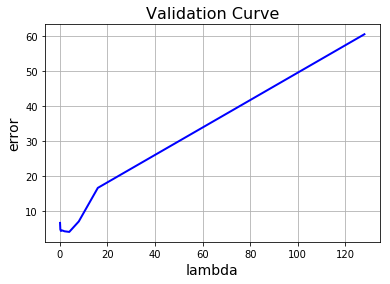

In [44]:
lambda_values = [1/8, 1/4, 1/2, 1, 2, 4, 8, 16, 128];
val_err = []
for lamb in lambda_values:
    theta = train_linear_regression(X_train_poly, y_train, lamb)
    val_err.append(cost(theta, X_val_poly, y_val))
plt.plot(lambda_values, val_err, c="b", linewidth=2)
plt.grid()
plt.xlabel("lambda", fontsize=14)
plt.ylabel("error", fontsize=14)
plt.title("Validation Curve", fontsize=16)
plt.show()

## The link to the github 

https://github.com/JaeHyunLim/assignment.git